In [1]:
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt
import random 

#  Non-Dividend Paying Black-Scholes Formula

In [2]:
def euro_vanilla_call(S, K, T, r, sigma):
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    d1 = (np.log(S/K) + (r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = (np.log(S/K) + (r-0.5*sigma**2)*T) / (sigma*np.sqrt(T))

    call = (S*si.norm.cdf(d1,0.0,1.0) - K*np.exp(-r*T)*si.norm.cdf(d2,0.0,1.0))
    payoff = max((S - K),0)

    return call,payoff

In [3]:
def Binary_call(S, K, T, r, sigma):
    d2 = (np.log(S/K) + (r-0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    
    call = np.exp(-r*T)*si.norm.cdf(d2,0.0,1.0)
    if(S>=K):
        payoff = 1.0;
    else:
        payoff = 0.0;
    return call,payoff

In [4]:
def euro_vanilla_put(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = (np.log(S/K) + (r-0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    
    put = (K*np.exp(-r*T)*si.norm.cdf(-d2,0.0,1.0) - S*si.norm.cdf(-d1,0.0,1.0))
    payoff = max((K - S),0)
    
    return put,payoff

In [5]:
def Binary_put(S, K, T, r, sigma):
    d2 = (np.log(S/K) + (r-0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    
    put = np.exp(-r*T) * (1-si.norm.cdf(d2,0.0,1.0))
    if(S<K):
        payoff = 1.0;
    else:
        payoff = 0.0;
    return put,payoff

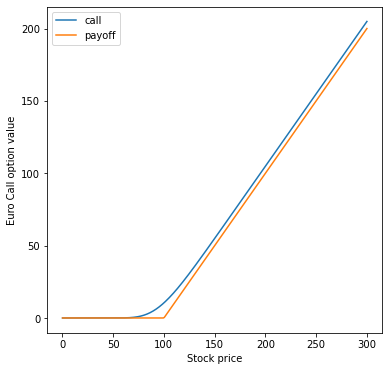

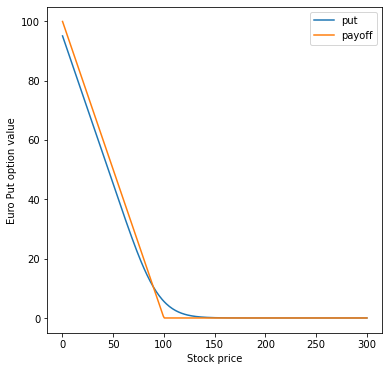

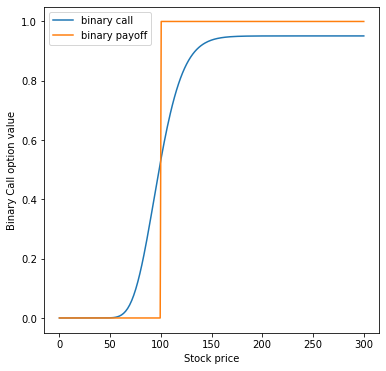

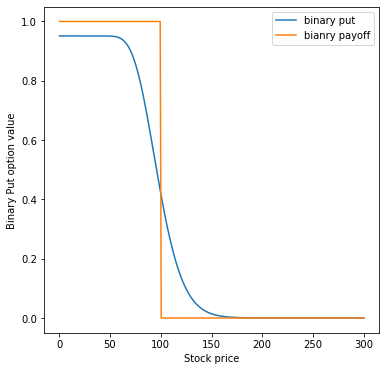

In [20]:
S = np.linspace(0.1,300,300)
p_call = []
p_put = []
c_payoff = []
p_payoff = []

b_call=[]
b_put=[]
bc_payoff=[]
bp_payoff=[]
for i in S:
    #get Euro call and put & their payoff 
    call,call_payoff = euro_vanilla_call(i, 100, 1, 0.05, 0.2)
    put,put_payoff = euro_vanilla_put(i, 100, 1, 0.05, 0.2)
    p_call.append(call)
    p_put.append(put)
    c_payoff.append(call_payoff)
    p_payoff.append(put_payoff)
    
    #get binary call and put & their payoff 
    binary_call,binary_call_payoff = Binary_call(i, 100, 1, 0.05, 0.2)
    binary_put,binary_put_payoff = Binary_put(i, 100, 1, 0.05, 0.2)
    b_call.append(binary_call)
    b_put.append(binary_put)
    bc_payoff.append(binary_call_payoff)
    bp_payoff.append(binary_put_payoff)
    
    
plt.figure(figsize=(6,6))
plt.plot(S,p_call,label = 'call')
plt.plot(S,c_payoff,label='payoff')
plt.xlabel("Stock price")
plt.ylabel("Euro Call option value")
plt.legend()
plt.savefig('Euro_call.png')

plt.figure(figsize=(6,6))
plt.plot(S,p_put,label='put')
plt.plot(S,p_payoff,label='payoff')
plt.xlabel("Stock price")
plt.ylabel("Euro Put option value")
plt.legend()
plt.savefig('Euro_put.png')

plt.figure(figsize=(6,6))
plt.plot(S,b_call,label = 'binary call')
plt.plot(S,bc_payoff,label='binary payoff')
plt.xlabel("Stock price")
plt.ylabel("Binary Call option value")
plt.legend()
plt.savefig('Binary_call.png')

plt.figure(figsize=(6,6))
plt.plot(S,b_put,label='binary put')
plt.plot(S,bp_payoff,label='bianry payoff')
plt.xlabel("Stock price")
plt.ylabel("Binary Put option value")
plt.legend()
plt.savefig('Binary_put.png')


# Dividend Paying Black-Scholes Formula

In [ ]:
def euro_call_div(S, K, T, r, q, sigma):
    #q: rate of continuous dividend paying asset 
    d1 = (np.log(S/K) + (r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = (np.log(S/K) + (r-0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    
    call_div = (S*np.exp(-q*T)*si.norm.cdf(d1,0.0,1.0) - K*np.exp(-r*T)*si.norm.cdf(d2, 0.0, 1.0))
    return call_div

In [ ]:
def euro_put_div(S, K, T, r, q, sigma):
    #q: rate of continuous dividend paying asset 
    d1 = (np.log(S/K) + (r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = (np.log(S/K) + (r-0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    
    put_div = (K*np.exp(-r*T)*si.norm.cdf(-d2,0.0,1.0)-S*np.exp(-q*T)*si.norm.cdf(-d1, 0.0, 1.0))
    return put_div

# Monte Carlo Simulation

#### Parameters：
    Stock = 100.0
    rate = 0.05
    sigma = 0.2
    Time = 1
    days = 252
    step = Time / days
    strike = 100.0
    disc = np.exp(-rate*Time)
    simulations = 270

In [7]:
def generate_stock(S,r,sig,dt,days,simulations):
    stock = np.zeros((days+1,simulations))
    stock[0] = S
    for i in range(days):
        for j in range(simulations):
            stock[i+1][j] = stock[i][j]*(1+r*dt+sig*np.sqrt(dt)*si.norm.ppf(np.random.rand()))
    return stock

In [8]:
def Vanilla_Call(stock,strike,rate,Time,simulations,days):
    sigma = 0.2
    #stock = generate_stock(100,rate,sigma,1/days,days,simulations)
    Euro_Payoff = []
    for i in range(simulations):
        Euro_Payoff.append(np.maximum(stock[days][i]-strike,0))
    DPO = []
    disc = np.exp(-rate*Time)
    for i in range(simulations):
        DPO.append(disc*Euro_Payoff[i])
    MC_Vanilla_Call = np.average(DPO)
    return MC_Vanilla_Call

In [9]:
def Binary_Call(stock,strike,rate,Time,simulations,days):
    Binary_Call_PO = []
    for i in range(simulations):
        if stock[days][i] > strike:
            Binary_Call_PO.append(1)
        else:
            Binary_Call_PO.append(0)
            
    Binary_DPO = []
    disc = np.exp(-rate*Time)
    for i in range(simulations):
        Binary_DPO.append(disc*Binary_Call_PO[i])
    
    MC_Binary_Call = np.average(Binary_DPO)
    
    return MC_Binary_Call

In [10]:
def generate_double_stock(S,r,sig,dt,days,simulations):
    stock1 = np.zeros((days+1,simulations))
    stock2 = np.zeros((days+1,simulations))
    stock1[0] = S
    stock2[0] = S
    for i in range(days):
        for j in range(simulations):
            RV = si.norm.ppf(np.random.rand())
            stock1[i+1][j] = stock1[i][j]*(1+r*dt+sig*np.sqrt(dt)*RV)
            stock2[i+1][j] = stock2[i][j]*(1+r*dt+sig*np.sqrt(dt)*(-RV))
    return stock1,stock2

# Compare simple Monte Carlo and Variance Reduction by Antitheric Variattes with Black sholes Model

X=100,S=85,BS_call=3.2135985531478717,MC_call=3.3972521986052304,BS_Bi_call=0.24141736650859835,MC_Bi_Call=0.25683194461519276,Error_of_Call=0.05714890718925091,Error_of_BinaryCall=0.015414578106594412,VR_call=3.5262211157314693,Error_VR_Call=0.0972811499051022,VR_binaryCall=0.937839722093017
X=100,S=100,BS_call=10.450583572185565,MC_call=8.637479931848372,BS_Bi_call=0.5323248154537634,MC_Bi_Call=0.4661024180053499,Error_of_Call=0.1734930521165157,Error_of_BinaryCall=0.06622239744841352,VR_call=9.608185779482262,Error_VR_Call=0.08060772749048777,VR_binaryCall=0.9472074394315347
X=100,S=110,BS_call=17.66295374059044,MC_call=14.376271380234181,BS_Bi_call=0.6987000510346408,MC_Bi_Call=0.6943974798855211,Error_of_Call=0.18607773131417318,Error_of_BinaryCall=0.004302571149119694,VR_call=18.05630528328399,Error_VR_Call=0.0222698620214131,VR_binaryCall=0.9617633097320827
X=200,S=85,BS_call=3.2135985531478717,MC_call=3.473642610024236,BS_Bi_call=0.24141736650859835,MC_Bi_Call=0.256831944615192

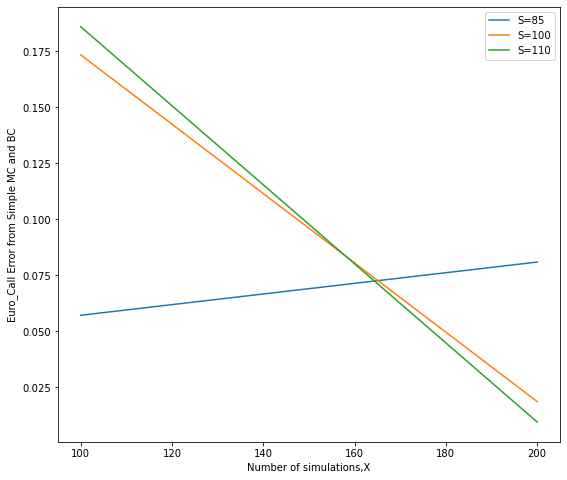

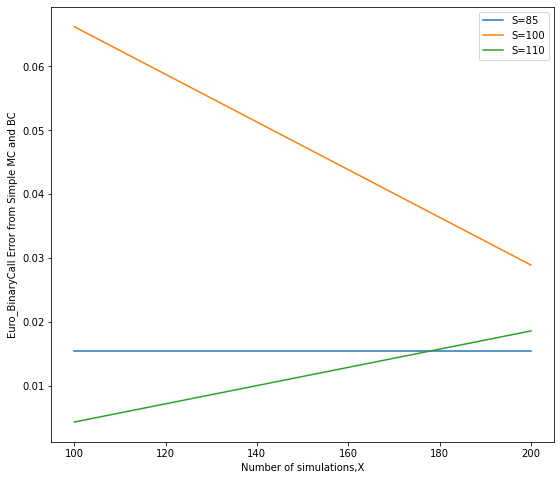

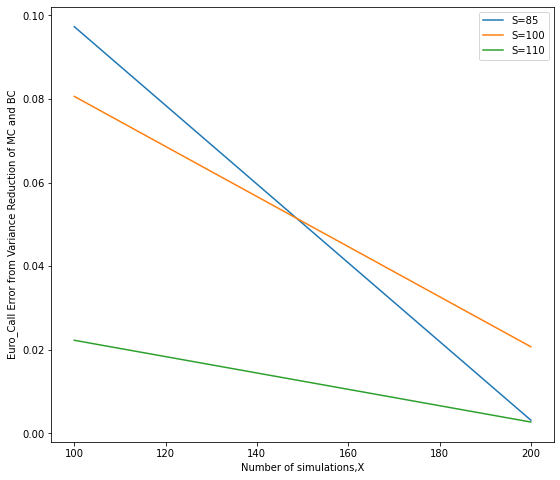

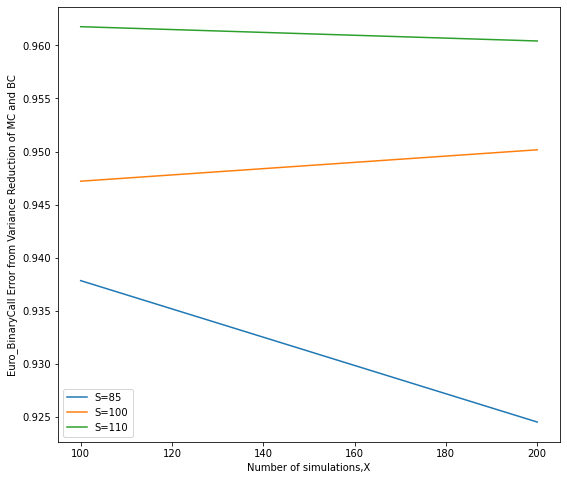

In [21]:
# X = [1000,5000,10000,50000,100000] #Number of simulations
# S = [85,95,100,105,110] #different stock price
X = [100,200] #Number of simulations
S = [85,100,110] #different stock price
Error_of_Call = np.zeros((len(S),len(X)))
Error_of_Binary_Call = np.zeros((len(S),len(X)))
Error_VR_Call = np.zeros((len(S),len(X)))
Error_VR_Binary_Call = np.zeros((len(S),len(X)))
for i in range(len(X)):#Simulations 
    for j in range(len(S)):#stock price
        stock = generate_stock(S[j],0.05,0.2,1/252,252,X[i])
        #Black Sholes
        BE_call,BE_call_payoff = euro_vanilla_call(S[j], 100, 1, 0.05, 0.2)
        #Simple Monte Carlo
        MC_call = Vanilla_Call(stock,100,0.05,1,X[i],252)
        #Error
        Error_of_Call[j][i] = abs((MC_call - BE_call) / BE_call)
        #For binary call
        BE_binary_call,BE_binary_call_payoff = Binary_call(S[j], 100, 1, 0.05, 0.2)
        MC_binary_call = Binary_Call(stock,100,0.05,1,X[i],252)
        Error_of_Binary_Call[j][i] = abs((MC_binary_call - BE_binary_call))
        #Antitheric Variattes
        stock1,stock2 = generate_double_stock(S[j],0.05,0.2,1/252,252,X[i])
        VR_call_1 = Vanilla_Call(stock1,100,0.05,1,X[i],252)
        VR_call_2 = Vanilla_Call(stock2,100,0.05,1,X[i],252)
        VR_call = (VR_call_1 + VR_call_2)/2
        Error_VR_Call[j][i] = abs((VR_call - BE_call) / BE_call)
        
        VR_binaryCall_1 = Binary_Call(stock1,100,0.05,1,X[i],252)
        VR_binaryCall_2 = Binary_Call(stock2,100,0.05,1,X[i],252)
        VR_binaryCall = (VR_binaryCall_1 + VR_binaryCall_2)/2
        Error_VR_Binary_Call[j][i] = abs((VR_binaryCall - BE_call) / BE_call)
        
        print('X='+str(X[i])+',S='+str(S[j])+',BS_call='+str(BE_call)+',MC_call='+str(MC_call)
              +',BS_Bi_call='+str(BE_binary_call)+',MC_Bi_Call='+str(MC_binary_call)
              +',Error_of_Call='+str(Error_of_Call[j][i])+',Error_of_BinaryCall='+str(Error_of_Binary_Call[j][i])
              +',VR_call='+str(VR_call)+',Error_VR_Call='+str(Error_VR_Call[j][i])
             +',VR_binaryCall='+str(Error_VR_Binary_Call[j][i]))

#plot the Error against X graph
fig = plt.figure(figsize=(9,8))
for i in range(len(S)):
    plt.plot(X,Error_of_Call[i],label='S='+str(S[i]) )
plt.xlabel("Number of simulations,X")
plt.ylabel("Euro_Call Error from Simple MC and BC")
plt.legend()
plt.savefig('Euro_Call_Error_from_Simple_MC_BC.png')

fig = plt.figure(figsize=(9,8))
for i in range(len(S)):
    plt.plot(X,Error_of_Binary_Call[i],label='S='+str(S[i]) )
plt.xlabel("Number of simulations,X")
plt.ylabel("Euro_BinaryCall Error from Simple MC and BC")
plt.legend()
plt.savefig('Euro_BinaryCall_Error_from_Simple_MC_BC.png')

fig = plt.figure(figsize=(9,8))
for i in range(len(S)):
    plt.plot(X,Error_VR_Call[i],label='S='+str(S[i]) )
plt.xlabel("Number of simulations,X")
plt.ylabel("Euro_Call Error from Variance Reduction of MC and BC")
plt.legend()
plt.savefig('Euro_Call_Error_from_VR_BC.png')

fig = plt.figure(figsize=(9,8))
for i in range(len(S)):
    plt.plot(X,Error_VR_Binary_Call[i],label='S='+str(S[i]) )
plt.xlabel("Number of simulations,X")
plt.ylabel("Euro_BinaryCall Error from Variance Reduction of MC and BC")
plt.legend()
plt.savefig('Euro_BinaryCall_Error_from_VR_BC.png')

plt.show()